## Basic code libraries templates for mid-term:


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from seaborn import relplot,displot,catplot
from matplotlib import pyplot as plt

In [8]:
import pandas as pd

### Normality Test:

In [19]:
from scipy.stats import shapiro
from statsmodels.api import qqplot

def test_for_normality(data):
    
    shapiro_test = shapiro(data)
    fig = qqplot(data, line='s')
    print("p value: ", shapiro_test.pvalue)
    
    
 #   return shapiro_test.pvalue

In [61]:
import pandas as pd

customerdata= pd.read_csv('../Datasets/Mall_Customers.csv')

customerdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
model = KMeans(n_clusters=4)

features=customerdata[['Annual Income (k$)','Spending Score (1-100)']]

model.fit(features)


KMeans(n_clusters=4)

In [63]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

### Finding out the elbow to find appropriate cluster:

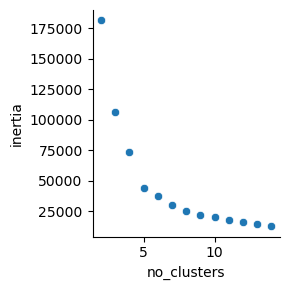

According to the analysis using the elbow method, the number of clusters 
should be 5 since the inertia is more stable from cluster 5


In [64]:
inertia=[]
cluster=[]
    
for i in range(2,15):
    model=KMeans(n_clusters=i)
    model.fit(features)
    
    cluster.append(i)
    inertia.append(model.inertia_)

    #print("clusters:",i ,"Inertia:", model.inertia_)

seaborn.relplot(x=cluster, y=inertia, height= 3)
plt.xlabel("no_clusters")
plt.ylabel("inertia")
plt.show()

print("""According to the analysis using the elbow method, the number of clusters 
should be 5 since the inertia is more stable and consistent from cluster 5""")

In [71]:
model=KMeans(n_clusters=5)
    
model.fit(features)

KMeans(n_clusters=5)

In [72]:
customerdata['labels']= model.labels_

In [73]:
customerdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


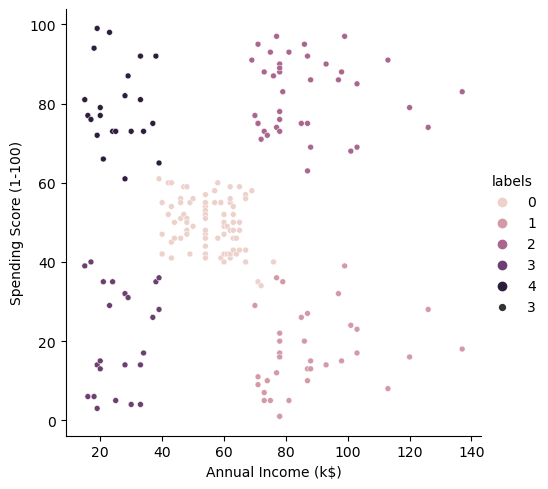

In [75]:
relplot(data=customerdata, x='Annual Income (k$)', y='Spending Score (1-100)', hue='labels', size=3)
plt.show()

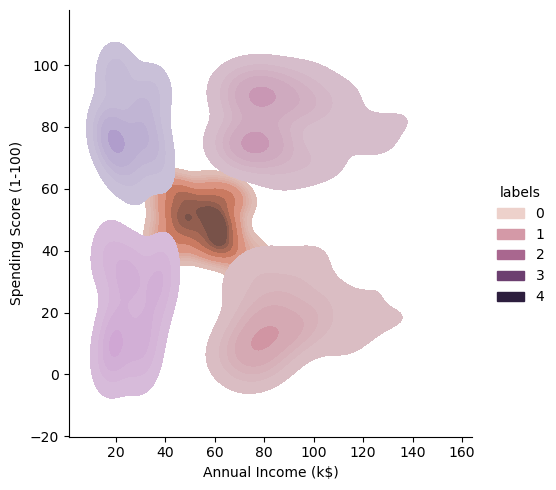

In [74]:
displot(data=customerdata, x='Annual Income (k$)', y='Spending Score (1-100)', 
        kind='kde', hue='labels', fill=True, height=2)

plt.show()